
.. redirect-from:: /tutorial/intermediate/tight_layout_guide


# Tight Layout guide

How to use tight-layout to fit plots within your figure cleanly.

*tight_layout* automatically adjusts subplot params so that the
subplot(s) fits in to the figure area. This is an experimental
feature and may not work for some cases. It only checks the extents
of ticklabels, axis labels, and titles.

An alternative to *tight_layout* is `constrained_layout
<constrainedlayout_guide>`.


## Simple Example

In matplotlib, the location of axes (including subplots) are specified in
normalized figure coordinates. It can happen that your axis labels or
titles (or sometimes even ticklabels) go outside the figure area, and are thus
clipped.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal
from IPython.display import Audio
#import mir_eval.sonify
import sounddevice as sd
import soundfile as sf

y, Fs = librosa.load('/Users/wizard/Library/CloudStorage/OneDrive-INSTITUTOTECNOLOGICOMETROPOLITANO-ITM/Procesamiento de Señales/Laboratorio_2/Grabacion.wav')

if len(y.shape)==2:
    # if audio is stereo
    channel1 = y[:,0]
    channel2 = y[:,1]
    y = (channel1 + channel2)/2


b,a = signal.cheby2(5, 50, [500, 3e3], btype='bandstop', analog=False, output='ba', fs=Fs)
#w = np.linspace(0, np.pi, int(10e3))
w, H = signal.freqz(b,a)

y_filtrada = signal.lfilter(b, a, y)

T = 1/Fs

tam = np.size(y)
t = np.arange(0, tam*T,T)

In [30]:
plt.rcParams['savefig.facecolor'] = "0.8"


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)


To prevent this, the location of axes needs to be adjusted. For
subplots, this can be done manually by adjusting the subplot parameters
using `.Figure.subplots_adjust`. `.Figure.tight_layout` does this
automatically.



It works with subplots created with
:func:`~matplotlib.pyplot.subplot2grid`. In general, subplots created
from the gridspec (`arranging_axes`) will work.



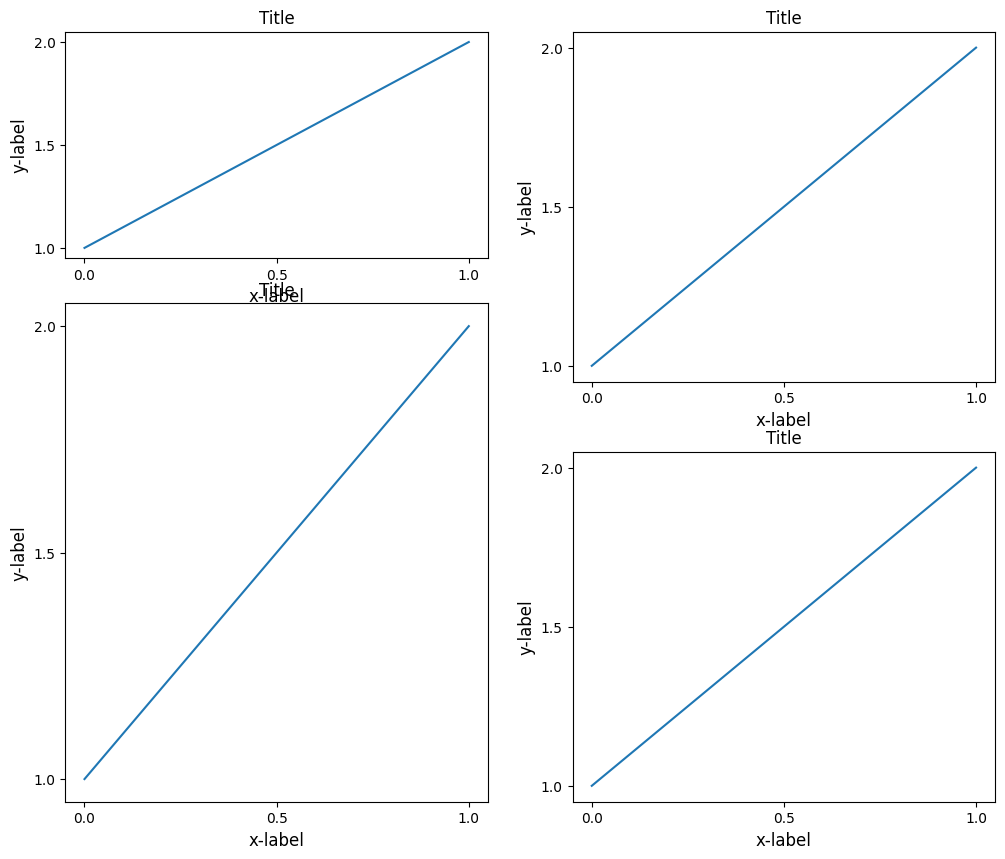

In [32]:
plt.close('all')
fig = plt.figure(figsize = (12,10))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=1, rowspan=2)
ax4 = plt.subplot2grid((2, 2), (1, 1))


example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)


Although not thoroughly tested, it seems to work for subplots with
aspect != "auto" (e.g., axes with images).



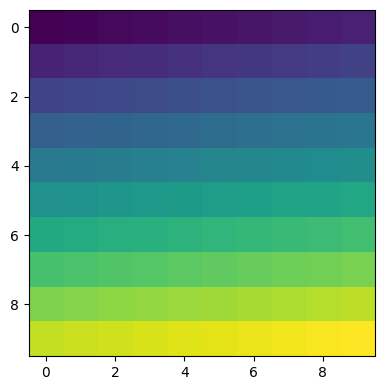

In [3]:
arr = np.arange(100).reshape((10, 10))

plt.close('all')
fig = plt.figure(figsize=(5, 4))

ax = plt.subplot()
im = ax.imshow(arr, interpolation="none")

plt.tight_layout()

## Caveats

* `~matplotlib.pyplot.tight_layout` considers all artists on the axes by
  default.  To remove an artist from the layout calculation you can call
  `.Artist.set_in_layout`.

* ``tight_layout`` assumes that the extra space needed for artists is
  independent of the original location of axes. This is often true, but there
  are rare cases where it is not.

* ``pad=0`` can clip some texts by a few pixels. This may be a bug or
  a limitation of the current algorithm, and it is not clear why it
  happens. Meanwhile, use of pad larger than 0.3 is recommended.

## Use with GridSpec

GridSpec has its own `.GridSpec.tight_layout` method (the pyplot api
`.pyplot.tight_layout` also works).



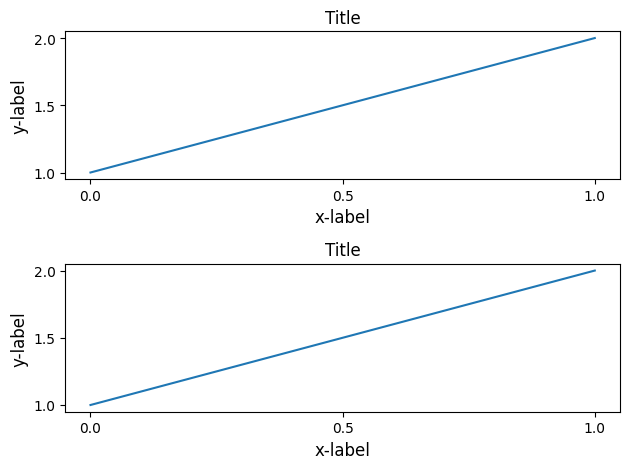

In [4]:
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig)

You may provide an optional *rect* parameter, which specifies the bounding
box that the subplots will be fit inside. The coordinates must be in
normalized figure coordinates and the default is (0, 0, 1, 1).



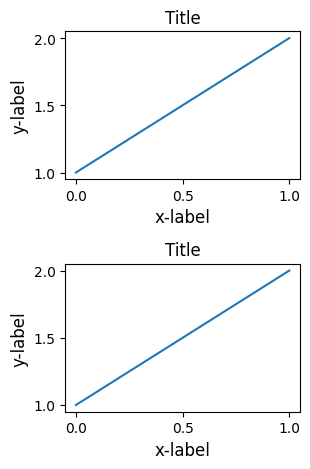

In [5]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1.0])

However, we do not recommend that this be used to manually construct more
complicated layouts, like having one GridSpec in the left and one in the
right side of the figure. For these use cases, one should instead take
advantage of :doc:`/gallery/subplots_axes_and_figures/gridspec_nested`, or
the :doc:`/gallery/subplots_axes_and_figures/subfigures`.



## Legends and Annotations

Pre Matplotlib 2.2, legends and annotations were excluded from the bounding
box calculations that decide the layout.  Subsequently, these artists were
added to the calculation, but sometimes it is undesirable to include them.
For instance in this case it might be good to have the axes shrink a bit
to make room for the legend:



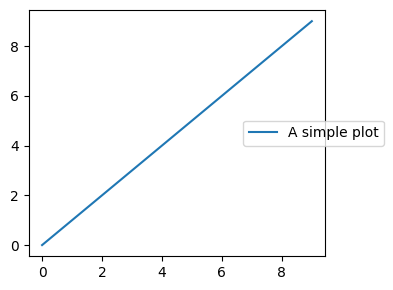

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='A simple plot')
ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
fig.tight_layout()
plt.show()

However, sometimes this is not desired (quite often when using
``fig.savefig('outname.png', bbox_inches='tight')``).  In order to
remove the legend from the bounding box calculation, we simply set its
bounding ``leg.set_in_layout(False)`` and the legend will be ignored.



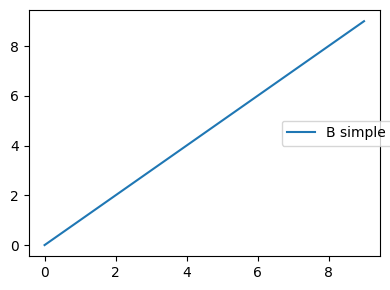

In [7]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='B simple plot')
leg = ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
leg.set_in_layout(False)
fig.tight_layout()
plt.show()

## Use with AxesGrid1

While limited, :mod:`mpl_toolkits.axes_grid1` is also supported.



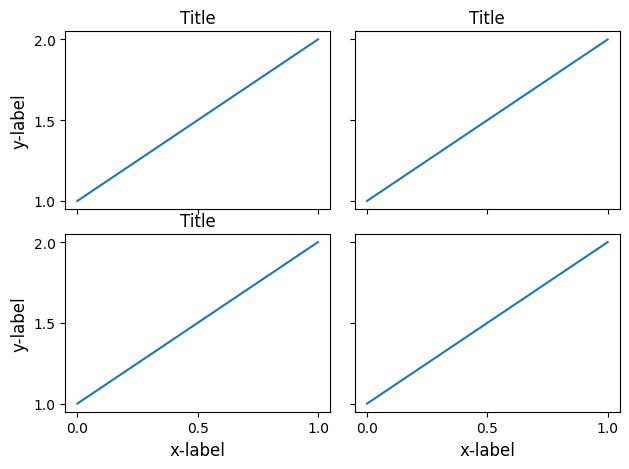

In [8]:
from mpl_toolkits.axes_grid1 import Grid

plt.close('all')
fig = plt.figure()
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.25, label_mode='L',
            )

for ax in grid:
    example_plot(ax)
ax.title.set_visible(False)

plt.tight_layout()

## Colorbar

If you create a colorbar with `.Figure.colorbar`, the created colorbar is
drawn in a Subplot as long as the parent axes is also a Subplot, so
`.Figure.tight_layout` will work.



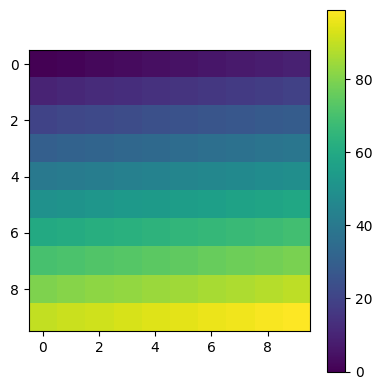

In [9]:
plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

plt.colorbar(im)

plt.tight_layout()

Another option is to use the AxesGrid1 toolkit to
explicitly create an Axes for the colorbar.



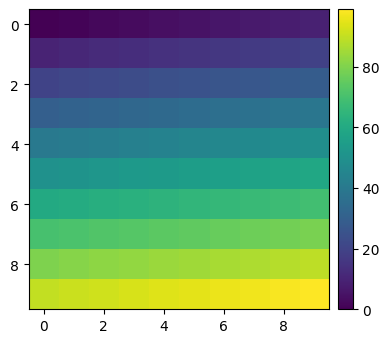

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()